# Latent Probability Model

If you are running this for the first time you may need to use the following commands before continuing:

In [3]:
!pip install pandas==1.3.5
!pip install spacy==3.2.0
!pip install spacytextblob
!python -m spacy download en_core_web_sm

!pip install newspaper3k

  Using cached pandas-1.3.5-cp310-cp310-win_amd64.whl (10.2 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.3.5 which is incompatible.


  Using cached typer-0.4.2-py3-none-any.whl (27 kB)
  Using cached pydantic-1.8.2-py3-none-any.whl (126 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.12
    Uninstalling pydantic-1.10.12:
      Successfully uninstalled pydantic-1.10.12
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chromadb 0.4.12 requires pydantic<2.0,>=1.9, but you have pydantic 1.8.2 which is incompatible.
chromadb 0.4.12 requires typer>=0.9.0, but you have typer 0.4.2 which is incompatible.


     ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
     --------------------------------------- 0.0/13.9 MB 991.0 kB/s eta 0:00:14
     ---------------------------------------- 0.1/13.9 MB 1.7 MB/s eta 0:00:09
     - -------------------------------------- 0.4/13.9 MB 2.9 MB/s eta 0:00:05
     - -------------------------------------- 0.7/13.9 MB 3.9 MB/s eta 0:00:04
     -- ------------------------------------- 1.0/13.9 MB 4.5 MB/s eta 0:00:03
     ----- ---------------------------------- 1.9/13.9 MB 7.3 MB/s eta 0:00:02
     ---------- ----------------------------- 3.6/13.9 MB 10.8 MB/s eta 0:00:01
     ---------------- ----------------------- 5.8/13.9 MB 15.4 MB/s eta 0:00:01
     ----------------------- ---------------- 8.0/13.9 MB 19.0 MB/s eta 0:00:01
     ---------------------------- ---------- 10.2/13.9 MB 21.8 MB/s eta 0:00:01
     ---------------------------------- ---- 12.4/13.9 MB 43.7 MB/s eta 0:00:01
     --------------------------------------  13.9/13.

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl#egg=en_core_web_sm==3.2.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617


Spacy: Used for NLP and has the machine learning module
    
SpacyTextBlob: Used for the sentiment analysis
    
Pandas: Stores the data as a dataframe table
    
NewsPaper: Used for web scraping
    
Requests: Makes the connection to the URL

In [1]:
from newspaper import Article
from random import shuffle
import re
import matplotlib.pyplot as plt 
from collections import Counter

import numpy as np
import json
import glob

#gensim
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary  # Import the Dictionary class from Gensim

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pandas as pd
import requests
from newspaper import Article
import numpy as np

In [3]:
%run SentimentAnalysis.ipynb
%run WebScraper.ipynb
%run PipelineHelpers.ipynb
%run TopicModeling.ipynb

IMPORTANT: If you want to try re-runing after making some code changes or want to 
run a new .csv file through the code block below and the one a couple down with the
 rerun note will need to be ran again for the analysis to work correctly

In [4]:
# Loading our two pipelines
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

IMPORTANT: Insert the .csv file you want to be read below.

In [5]:
csvFile = "urls.csv"
wordCountFilter = 250
social_starts_with = ["https://www.youtube.com", "https://youtu.be", "https://www.facebook.com", 
                      "https://twitter.com", "https://gettr.com/"]


In [6]:
# rerun
# Using panda to load in our .csv file
df = pd.read_csv(csvFile) # File we are checking
urls = df["Address"].tolist() # Column name we are checking
all_text_gathered = []
all_articles = ''
scentence_list = []


# This is the pipeline. All code is called and ran through here.

In [7]:
# Loops through our URLS and scraps the data
# Put all empty dictionaries here
sentimentDic = {}
    
for count, x in enumerate(urls):
    if(count % 10 == 0):
        print(str(count))

    url = x

    # Send the URL to get scraped
    page_text = scrapeData(x)
    # All articles will have a long string of all the text that has been scraped
    all_articles = all_articles + " " +  page_text
    
    # Puts the article into a list of all the sentences in the article
    sentenceList = sentenceLevel(page_text)

    # Runs sentiment analysis. Will need to make a new function and a new dictionary
    # for each type of analysis we want to run. Will pass in the page_text, the dic, and
    # x (the url)
    sentimentDic = sentimentAnalysis(page_text, sentimentDic, url)
        
        
        
#print("The average sentiment score was: " + str(sum(url_sent_score) / len(url_sent_score)))
#print("The average subjectivity score was: " + str(sum(url_subj_score) / len(url_subj_score)))

# For each analysis we run we need to then convert that dictionary with the following method
sentDic = dictionaryToDataFrame(sentimentDic)
sentDic
# Used if we want to convert it to a .csv sentDic.to_csv("sentiment130.csv")


0
10
20
30


,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words
0,https://www.thegatewaypundit.com/2022/05/world...,0.05,Neutral Positive,0.28,"confident, supporting, new, effectively, thank...","absolutely, single, past, other, needless"
1,https://gettr.com/post/ptt4ta7c84,0.00,PARERROR: WebBlockerError,0.00,,
2,https://komonews.com/news/coronavirus/if-covid...,0.00,PARERROR: WebBlockerError,0.00,,
3,https://www.lewrockwell.com/2018/11/no_author/...,0.10,Neutral Positive,0.41,"early, true, extraordinary, major, far, effect...","killed, few, military, waste, poor, active, ap..."
4,https://nation.com.pk/08-Apr-2021/russia-offer...,0.07,Neutral Positive,0.28,"natural, early, important, economic, ready, ne...","actively, foreign, military, mainly"
5,https://barrie.ctvnews.ca/cfb-borden-based-mil...,-0.02,Neutral Negative,0.38,"first, willingly, good, unique, fine, full, not","due, guilty, sorry, base, not, other, wrong, m..."
6,https://www.reuters.com/world/us/us-army-disch...,0.00,PARERROR: WebBlockerError,0.00,,
7,https://www.dailysabah.com/world/europe/sweden...,0.03,Neutral Negative,0.30,"first, kind, new, light, direct, directly","green, active, long, foreign, military, previo..."
8,https://www.military.com/daily-news/2022/11/01...,0.07,Neutral Positive,0.46,"fly, nearly, most, general, legal, new, sincer...","active, approximately, base, firm, behind, pre..."
9,https://roundingtheearth.substack.com/p/defini...,0.00,PARERROR: WebBlockerError,0.00,,


## Pre-Processing

In [8]:
rawData = []
for url in open("urls.csv"):
    scrapedData = scrapeData(url)
    if filter_scrape_data(scrapedData):
        rawData.append(scrapedData)

### Lemmatize Data

In [9]:
lemmatizedData = lemmatization(rawData)

### Remove Stop Words

In [10]:
filteredData = [preprocess_article(x) for x in lemmatizedData]

### Tokenize

In [11]:
tokenizedData = gen_words(filteredData)

### Create Dictionary

In [12]:
id2word = corpora.Dictionary(tokenizedData)
id2word.filter_extremes(no_below=0.1, no_above=0.9)

### Create Corpus

In [13]:
corpus = [id2word.doc2bow(text) for text in tokenizedData]

## Topic Modeling

In [16]:
#configuration for running our LDA model, topic_limit =max topics, topic_start = start of # of topics, topic_step = what increment we add to the # of topics
topic_limit = 30; topic_start=5; topic_step=5;

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, tokenizedData=tokenizedData, limit=topic_limit, start=topic_start, step=topic_step)

### Visualization

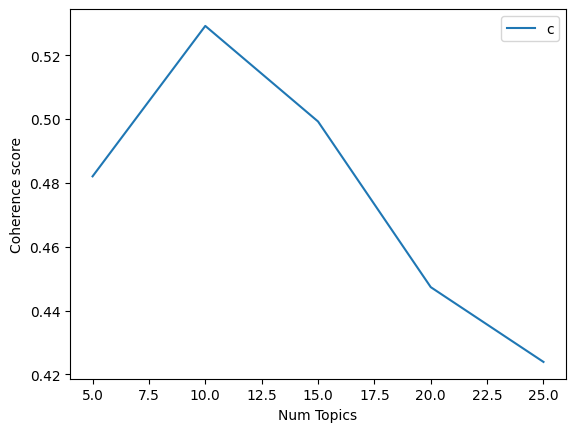

In [17]:
x = range(topic_start, topic_limit, topic_step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()